## ANALISIS DE DATOS DE LLAMADA DE MESA DE SERVICIO ENTRE EL 17 Y EL 29 DE JULIO

### Objetivos

#### - Limpiar datos
#### - Graficar numero de llamados por dia
#### - Graficar consultas/areas mas frecuentes
#### - Graficar consultas/areas agrupadas por dia

<br>

Se importan los modulos de numpy y pandas para manejar los datos; y los modulos matplotlib y seaborn para realizar los graficos.

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

#### Limpieza de datos

Ante de importar el csv se eliminaron los datos personales del archivo, especificamente las columnas 'ID_ATENCION', 'RUT_CLIENTE', 'NOMBRE_CLIENTE', 'USUARIO_CREACION', 'USUARIO_ASIG', 'ESTADO_ATENCION', 'ESFUERZO', 'TIEMPO_RESOLUCION', 'OBSERVACION', 'OBSERVACION_CLIENTE'

La columna 'AREA' y 'SEDE' decidi eliminarlas ya que solo se tenian datos de la mesa de servicios de la sede Antonio Varas

Importamos el csv con los datos a un DataFrame de pandas 

In [5]:
call_csv_route = os.path.join("res","exporte_tickets_17al29.csv")
call_df = pd.read_csv(call_csv_route, engine="python", header=0, delimiter=";")

call_df.sample(5)

,FECHA_CREACION,CARRERA,NIVEL_1,NIVEL_2,NIVEL_3,NIVEL_4
545,26-07-2023 13:24,ECOTURISMO,Inscripción de asign,Oferta académica,Asignatura no disponible,Resuelto
476,26-07-2023 14:37,GASTRONOMÍA INTERNACIONAL,Inscripción de asign,Información del proceso,Uso plataforma IA,Resuelto
564,26-07-2023 13:16,GASTRONOMÍA INTERNACIONAL,Tecnología,Plataformas Alumnos,SAP NetWork IA,Resuelto
1493,18-07-2023 9:21,INGENIERÍA EN CONECTIVIDAD Y REDES,Titulado,Información y gestión,Otras consultas,Resuelto
314,26-07-2023 19:22,INGENIERÍA EN ADMINISTRACIÓN MENCIÓN GESTIÓN D...,Fuera de alcance,Fuera de alcance,Fuera de alcance,Resuelto


In [6]:
call_df.columns

Index(['FECHA_CREACION', 'CARRERA', 'NIVEL_1', 'NIVEL_2', 'NIVEL_3',
       'NIVEL_4'],
      dtype='object')

In [7]:
call_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   FECHA_CREACION  1565 non-null   object
 1   CARRERA         1552 non-null   object
 2   NIVEL_1         1565 non-null   object
 3   NIVEL_2         1565 non-null   object
 4   NIVEL_3         1565 non-null   object
 5   NIVEL_4         1565 non-null   object
dtypes: object(6)
memory usage: 73.5+ KB


Se eliminara la columna "NIVEL_5" porque esta vacia

Cambiamos el tipo de datos de la columna "FECHA_CREACION" de object a datetime

In [8]:
call_df["FECHA_CREACION"] = pd.to_datetime(call_df["FECHA_CREACION"], dayfirst=True)

call_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FECHA_CREACION  1565 non-null   datetime64[ns]
 1   CARRERA         1552 non-null   object        
 2   NIVEL_1         1565 non-null   object        
 3   NIVEL_2         1565 non-null   object        
 4   NIVEL_3         1565 non-null   object        
 5   NIVEL_4         1565 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 73.5+ KB


In [9]:
call_df.sample(5)

,FECHA_CREACION,CARRERA,NIVEL_1,NIVEL_2,NIVEL_3,NIVEL_4
1515,2023-07-17 16:59:00,GASTRONOMÍA INTERNACIONAL,Académico,Interrupción del semestre,Suspensión,Resuelto
786,2023-07-26 11:36:00,INGENIERÍA EN COMERCIO EXTERIOR,Inscripción de asign,Información del proceso,Uso plataforma IA,Resuelto
1525,2023-07-17 14:37:00,INGENIERÍA EN MARKETING DIGITAL,Información general,Información general,Servicios y otros,Resuelto
957,2023-07-25 09:17:00,INGENIERÍA EN INFORMÁTICA,Titulado,Información y gestión,Cuenta titulado,Resuelto
1478,2023-07-18 11:37:00,INGENIERÍA EN ADMINISTRACIÓN,Titulado,Información y gestión,Certificado de título,Resuelto


Rellenamos los datos NaN que quedan en carrera con "Sin Informacion"

In [10]:
call_df["CARRERA"] = call_df["CARRERA"].fillna("Sin Informacion")

call_df.sample(5)

,FECHA_CREACION,CARRERA,NIVEL_1,NIVEL_2,NIVEL_3,NIVEL_4
418,2023-07-26 17:37:00,INGENIERÍA EN COMERCIO EXTERIOR,Inscripción de asign,Información del proceso,Ventana de inscripción,Resuelto
417,2023-07-26 17:37:00,GASTRONOMÍA INTERNACIONAL,Académico,Contacto coordinador de carrera,Programa de estudios,Resuelto
1100,2023-07-24 09:23:00,GASTRONOMÍA INTERNACIONAL,Financiamiento,Pagos y Deudas,Pago en línea,Resuelto
1274,2023-07-20 11:35:00,TOURISM AND HOSPITALITY,Inscripción de asign,Información del proceso,Ventana de inscripción,Resuelto
179,2023-07-28 09:56:00,GASTRONOMÍA INTERNACIONAL,Fuera de alcance,Fuera de alcance,Fuera de alcance,Resuelto


In [11]:
call_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FECHA_CREACION  1565 non-null   datetime64[ns]
 1   CARRERA         1565 non-null   object        
 2   NIVEL_1         1565 non-null   object        
 3   NIVEL_2         1565 non-null   object        
 4   NIVEL_3         1565 non-null   object        
 5   NIVEL_4         1565 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 73.5+ KB


#### Grafico numero de llamados por dia

Se crea otro Dataframe agrupando el numero de llamados por dia.

In [12]:
calls_per_day = call_df.groupby([call_df['FECHA_CREACION'].dt.date]).size().reset_index(name='N° Llamados')
calls_per_day

,FECHA_CREACION,N° Llamados
0,2023-07-17,70
1,2023-07-18,79
2,2023-07-19,124
3,2023-07-20,104
4,2023-07-21,72
5,2023-07-22,13
6,2023-07-24,144
7,2023-07-25,107
8,2023-07-26,554
9,2023-07-27,109


Basado en este Dataframe se crea un grafico de barras mostrando la cantidad de llamados por fecha

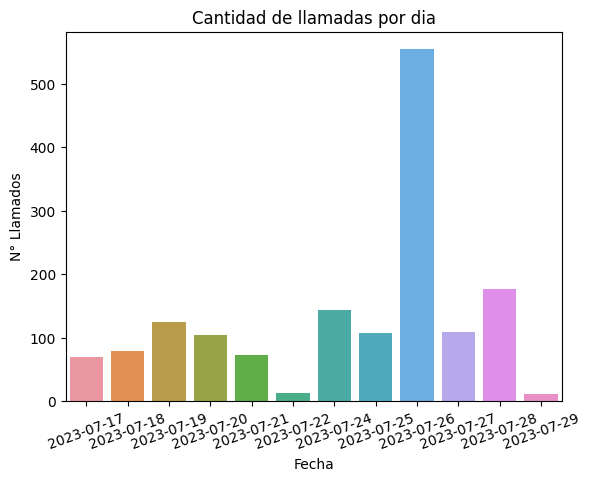

<Figure size 1000x900 with 0 Axes>

In [13]:
calls_per_day_data = calls_per_day.copy()

calls_plot = sns.barplot(x='FECHA_CREACION', y='N° Llamados',data=calls_per_day_data)
calls_plot.set_title("Cantidad de llamadas por dia")
calls_plot.set_xlabel("Fecha")
plt.xticks(rotation=20)
plt.figure(figsize = (10,9))

calls_plot.figure.savefig("calls_per_day.png", dpi=300)
plt.show()

#### Grafico consultas/areas mas frecuentes

Al igual que la cantidad de llamados por dia, se agrupan en un nuevo Dataframe la cantidad de llamados que se tuvieron por carrera. Con estos datos se crea un grafico representativo

In [14]:
carrers_data = call_df.groupby(call_df['CARRERA']).size().reset_index(name='N° Llamados por Carrera')
carrers_data = carrers_data.sort_values(['N° Llamados por Carrera'], ascending=False)
carrers_data.head()

,CARRERA,N° Llamados por Carrera
32,INGENIERÍA EN INFORMÁTICA,246
14,GASTRONOMÍA INTERNACIONAL,221
29,INGENIERÍA EN COMERCIO EXTERIOR,162
44,TURISMO Y HOTELERÍA,119
13,ECOTURISMO,80


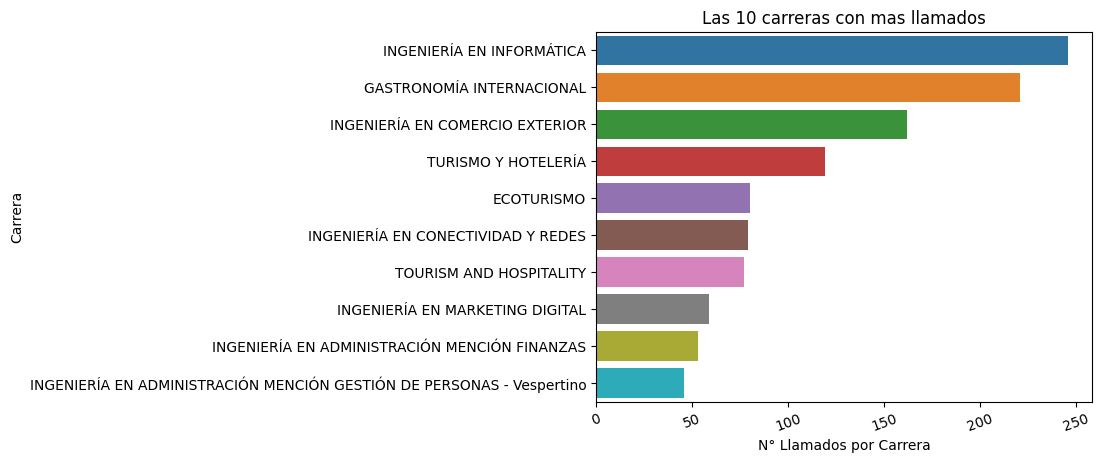

<Figure size 1200x900 with 0 Axes>

In [15]:
carrers_plot = sns.barplot(y='CARRERA', x='N° Llamados por Carrera',data=carrers_data.head(10))
carrers_plot.set_title("Las 10 carreras con mas llamados")
carrers_plot.set_ylabel("Carrera")
plt.xticks(rotation=20)
plt.figure(figsize = (12,9))

carrers_plot.figure.savefig("carrers_calls.png", dpi=300, bbox_inches='tight')
plt.show()

#### - Graficar consultas/areas mas frecuentes

Tambien se creo un Dataframe agrupando las areas de consultas designadas como "Nivel_1" en los datos para crear un grafico mostrando la cantidad de llamados por consulta/area

In [16]:
level_1 = call_df.groupby(call_df['NIVEL_1']).size().reset_index(name='N° Llamados')
level_1.head()

,NIVEL_1,N° Llamados
0,Académico,390
1,Financiamiento,279
2,Fuera de alcance,104
3,Gestión de abandono,3
4,Información general,92


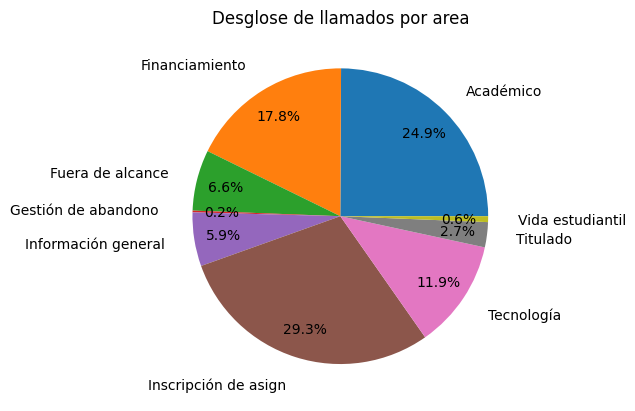

<Figure size 1000x900 with 0 Axes>

In [17]:
fig, ax = plt.subplots()

ax.pie(level_1["N° Llamados"], labels=level_1["NIVEL_1"], autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.2)

plt.title("Desglose de llamados por area")
plt.figure(figsize = (10,9))
fig.savefig("calls_per_area.png", dpi=300, bbox_inches='tight')

plt.show()

#### Graficar consultas/areas agrupadas por dia

Por ultimo, se agruparon el numero de llamados por area y la fecha. Para hacer un grafico de barras que desglose la cantidad de consultas de cada area por dia. Se puede notar que dia ocurrieron las inscripciones basada en el alto volumen de llamados y la cantidad de consultas sobre inscripcion, particularmente el 26, 27 y 28 de Julio.

In [18]:
grouped_calls = call_df.groupby([call_df['FECHA_CREACION'].dt.date, "NIVEL_1"]).size().reset_index(name='N° Llamados')
grouped_calls

,FECHA_CREACION,NIVEL_1,N° Llamados
0,2023-07-17,Académico,30
1,2023-07-17,Financiamiento,22
2,2023-07-17,Fuera de alcance,4
3,2023-07-17,Información general,4
4,2023-07-17,Inscripción de asign,3
...,...,...,...
82,2023-07-28,Titulado,1
83,2023-07-28,Vida estudiantil,1
84,2023-07-29,Académico,3
85,2023-07-29,Fuera de alcance,1


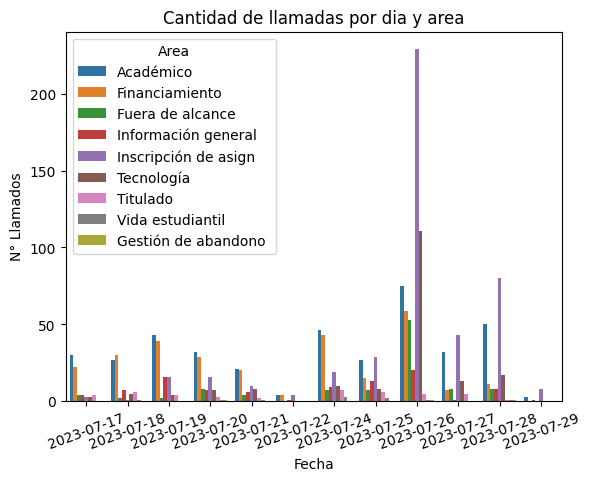

<Figure size 2000x2000 with 0 Axes>

In [19]:
grouped_calls_plot = sns.barplot(x='FECHA_CREACION', y='N° Llamados', data=grouped_calls, hue="NIVEL_1")
grouped_calls_plot.set_title("Cantidad de llamadas por dia y area")
grouped_calls_plot.set_xlabel("Fecha")
grouped_calls_plot.legend(title="Area")
plt.xticks(rotation=20)
plt.figure(figsize = (20,20))

grouped_calls_plot.figure.savefig("calls_per_day_area.png", dpi=600, bbox_inches='tight')
plt.show()